# Creating NBA Shot Charts with Python

## Dependencies

In [13]:
from nba_api.stats.endpoints import shotchartdetail, playercareerstats
from nba_api.stats.static import players, teams
from modules.datasets import NbaScraper
from modules.charts.charts import ShotCharts
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [14]:
# get player id
name = "LeBron James"
id = NbaScraper.get_json_from_name(name)['id']
print(id)
career = NbaScraper.get_player_career(id)
teams = ['LAL']
team_ids = list(set(career[career.TEAM_ABBREVIATION.isin(teams)].TEAM_ID.values))

seasons = ['2022-23']
shot_data = NbaScraper.get_shot_data(id, team_ids, seasons)
shot_data.tail()

2544


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
522,Shot Chart Detail,0022200492,609,2544,LeBron James,1610612747,Los Angeles Lakers,4,4,52,...,Center(C),Less Than 8 ft.,3,-21,27,1,1,20221223,LAL,CHA
523,Shot Chart Detail,0022200492,616,2544,LeBron James,1610612747,Los Angeles Lakers,4,4,27,...,Right Side Center(RC),24+ ft.,25,184,183,1,1,20221223,LAL,CHA
524,Shot Chart Detail,0022200492,638,2544,LeBron James,1610612747,Los Angeles Lakers,4,2,28,...,Center(C),Less Than 8 ft.,1,9,16,1,1,20221223,LAL,CHA
525,Shot Chart Detail,0022200492,647,2544,LeBron James,1610612747,Los Angeles Lakers,4,1,52,...,Center(C),Less Than 8 ft.,1,-2,12,1,1,20221223,LAL,CHA
526,Shot Chart Detail,0022200492,666,2544,LeBron James,1610612747,Los Angeles Lakers,4,0,42,...,Center(C),Less Than 8 ft.,0,4,8,1,1,20221223,LAL,CHA


In [15]:
shot_data.sort_values(by=['SHOT_DISTANCE'])

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
526,Shot Chart Detail,0022200492,666,2544,LeBron James,1610612747,Los Angeles Lakers,4,0,42,...,Center(C),Less Than 8 ft.,0,4,8,1,1,20221223,LAL,CHA
172,Shot Chart Detail,0022200131,586,2544,LeBron James,1610612747,Los Angeles Lakers,4,6,13,...,Center(C),Less Than 8 ft.,0,2,9,1,1,20221104,LAL,UTA
163,Shot Chart Detail,0022200131,288,2544,LeBron James,1610612747,Los Angeles Lakers,2,2,44,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20221104,LAL,UTA
138,Shot Chart Detail,0022200117,299,2544,LeBron James,1610612747,Los Angeles Lakers,2,1,57,...,Center(C),Less Than 8 ft.,0,-4,7,1,1,20221102,LAL,NOP
482,Shot Chart Detail,0022200451,647,2544,LeBron James,1610612747,Los Angeles Lakers,4,0,27,...,Center(C),Less Than 8 ft.,0,-4,9,1,1,20221218,LAL,WAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Shot Chart Detail,0022200037,214,2544,LeBron James,1610612747,Los Angeles Lakers,2,11,3,...,Center(C),24+ ft.,31,56,311,1,0,20221023,LAL,POR
353,Shot Chart Detail,0022200360,55,2544,LeBron James,1610612747,Los Angeles Lakers,1,7,0,...,Center(C),24+ ft.,32,-82,312,1,0,20221206,CLE,LAL
42,Shot Chart Detail,0022200016,703,2544,LeBron James,1610612747,Los Angeles Lakers,4,0,2,...,Right Side Center(RC),24+ ft.,32,178,277,1,0,20221020,LAL,LAC
420,Shot Chart Detail,0022200413,332,2544,LeBron James,1610612747,Los Angeles Lakers,2,0,1,...,Center(C),24+ ft.,32,65,323,1,0,20221213,LAL,BOS


## Shot Charts

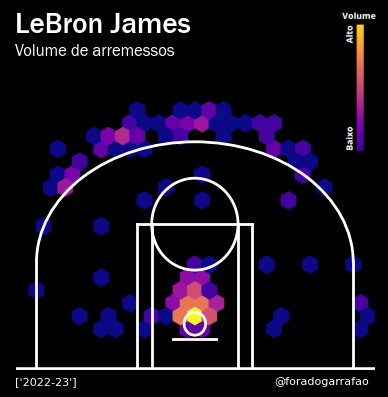

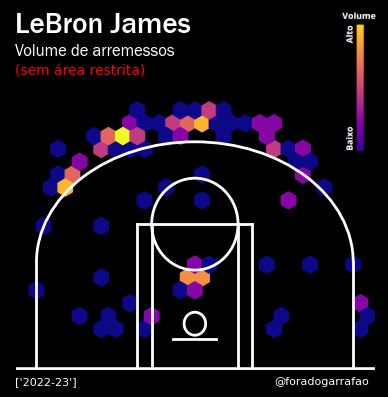

In [16]:
chart1 = ShotCharts.volume_chart(shot_data, name, seasons)
chart2 = ShotCharts.volume_chart(shot_data, name, seasons, RA=False)
plt.show()

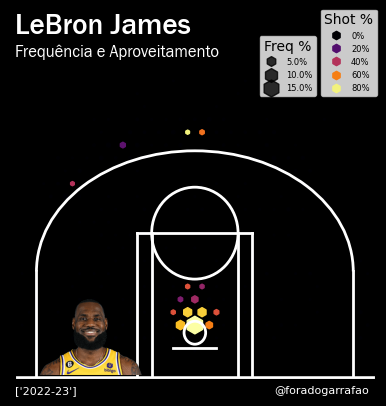

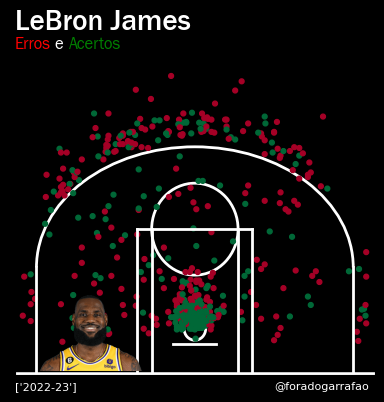

In [17]:
chart3 = ShotCharts.frequency_chart(shot_data, name, seasons)
chart4 = ShotCharts.makes_misses_chart(shot_data, name, seasons)
plt.show()